Link to [colab](https://colab.research.google.com/github/casangi/astroviper/blob/main/examples/demo_standard_gridder.ipynb)

In [ ]:
!pip install astroviper

  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of distributed to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.2/189.2 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.3/211.3 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 85.8 MB/s eta 0:00:00
  Created wheel for as

**DEMO OF standard gridder**

In [ ]:
import numpy as np
from matplotlib import pylab as pl
from astroviper.core.imaging.imaging_utils.standard_grid import *
from astroviper.core.imaging.imaging_utils.gcf_prolate_spheroidal import *
from astroviper.core.imaging.fft import fft_lm_to_uv
from astroviper.core.imaging.ifft import ifft_uv_to_lm


In [ ]:
from astroviper.core.imaging.imaging_utils.standard_gridding_example import generate_ms4_with_point_sources

Lets generate a ms4 dataArray with a few point sources in it

_sources_ will have the position and flux of source, _npix_ is the size of the image you may wish to make, _cell_ the cellsize determined from max uv and _ms4_ will be an xradio msv4 dataArray
Here we are putting 4 point sources of 1 Jy visibilities

We have simple function that generates a ms v4 dataArray called *genrate_ms4_with_point_sources*

In [ ]:
help(generate_ms4_with_point_sources)

Help on function generate_ms4_with_point_sources in module astroviper.core.imaging.imaging_utils.standard_gridding_example:

generate_ms4_with_point_sources(nsources: int = 2, flux: numpy.ndarray = array([1., 5.]))
    Parameters
    ----------
    nsources : int,
        DESCRIPTION. The default is 2.
    flux : np.ndarray, length of nsources
        DESCRIPTION. The default is np.array([1.0, 5.0]).

    Returns
    -------
    A tuple of (npix, cell), ms4



In [ ]:
nsources = 4
sources, npix, cell, ms4 = generate_ms4_with_point_sources(nsources, np.ones(nsources))

[2025-09-16 20:31:17,555]     INFO    viperlog:  Module path: /usr/local/lib/python3.12/dist-packages/toolviper 


INFO:viperlog:Module path: /usr/local/lib/python3.12/dist-packages/toolviper


[2025-09-16 20:31:17,569]     INFO    viperlog:  Downloading from [cloudflare] .... 


INFO:viperlog:Downloading from [cloudflare] ....


 Download List                    
 ───────────────────────────────── 
  Antennae_fld1_casa_lsrk.ps.zarr

[2025-09-16 20:31:17,580]  WARNING    viperlog:  Couldn't find file metadata locally in /usr/local/lib/python3.12/dist-packages/toolviper/utils/data/.cloudflare/file.download.json 


[2025-09-16 20:31:17,583]     INFO    viperlog:  Creating path:/content/.cloudflare 


INFO:viperlog:Creating path:/content/.cloudflare


[2025-09-16 20:31:17,586]     INFO    viperlog:  Updating file metadata information ...  


INFO:viperlog:Updating file metadata information ... 


Output()

Output()

ms4 is xradio object which is basically an xarray dataTree; data can be accessed and displayed just like pandas

In [ ]:
display(ms4)

<xarray.DataTree 'Antennae_fld1_casa_lsrk_0'>
Group: /
│   Dimensions:                     (time: 70, baseline_id: 86, frequency: 1,
│                                    polarization: 2, uvw_label: 3)
│   Coordinates:
│       baseline_antenna1_name      (baseline_id) <U9 3kB ...
│       baseline_antenna2_name      (baseline_id) <U9 3kB ...
│     * baseline_id                 (baseline_id) int64 688B 0 1 2 3 ... 82 83 84 85
│       field_name                  (time) <U46 13kB ...
│     * frequency                   (frequency) float64 8B 3.449e+11
│     * polarization                (polarization) <U2 16B 'XX' 'YY'
│       scan_name                   (time) <U21 6kB ...
│     * time                        (time) float64 560B 1.307e+09 ... 1.308e+09
│     * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
│   Data variables:
│       EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 48kB ...
│       FLAG                        (time, baseline_id, frequency, polarization) bool 12kB ...
│       TIME_CENTROID               (time, baseline_id) float64 48kB ...
│       UVW                         (time, baseline_id, uvw_label) float64 144kB ...
│       VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 96kB ...
│       WEIGHT                      (time, baseline_id, frequency, polarization) float32 48kB ...
│   Attributes:
│       creation_date:     2025-08-18T19:20:32.601592+00:00
│       creator:           {'software_name': 'xradio', 'version': '0.0.58'}
│       data_groups:       {'base': {'correlated_data': 'VISIBILITY', 'date': '20...
│       observation_info:  {'intents': ['OBSERVE_TARGET#ON_SOURCE'], 'observer': ...
│       processor_info:    {'sub_type': 'ALMA_CORRELATOR_MODE', 'type': 'CORRELAT...
│       schema_version:    4.0.-9988
│       type:              visibility
├── Group: /antenna_xds
│       Dimensions:                 (antenna_name: 14, cartesian_pos_label: 3,
│                                    receptor_label: 2)
│       Coordinates:
│         * antenna_name            (antenna_name) <U9 504B 'DV02_A015' ... 'DV13_A075'
│         * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
│           mount                   (antenna_name) <U6 336B ...
│           polarization_type       (antenna_name, receptor_label) <U1 112B ...
│         * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
│           station_name            (antenna_name) <U4 224B ...
│           telescope_name          (antenna_name) <U4 224B ...
│       Data variables:
│           ANTENNA_DISH_DIAMETER   (antenna_name) float64 112B ...
│           ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 336B ...
│           ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 224B ...
│       Attributes:
│           overall_telescope_name:  ALMA
│           relocatable_antennas:    True
│           type:                    antenna
├── Group: /field_and_source_base_xds
│       Dimensions:                       (field_name: 1, sky_dir_label: 2)
│       Coordinates:
│         * field_name                    (field_name) <U46 184B 'NGC4038 - Antennae ...
│         * sky_dir_label                 (sky_dir_label) <U3 24B 'ra' 'dec'
│           source_name                   (field_name) <U46 184B ...
│       Data variables:
│           FIELD_PHASE_CENTER_DIRECTION  (field_name, sky_dir_label) float64 16B ...
│           SOURCE_DIRECTION              (field_name, sky_dir_label) float64 16B ...
│       Attributes:
│           type:     field_and_source
└── Group: /weather_xds
        Dimensions:              (station_name: 2, time_weather: 259,
                                  cartesian_pos_label: 3)
        Coordinates:
          * cartesian_pos_label  (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
          * station_name         (station_name) <U10 80B 'Station_11' 'Station_12'
          * time_weather         (time_weather) float64 2kB 1.307e+09 ... 1.307e+09

One can visualize the data etc just like with pandas

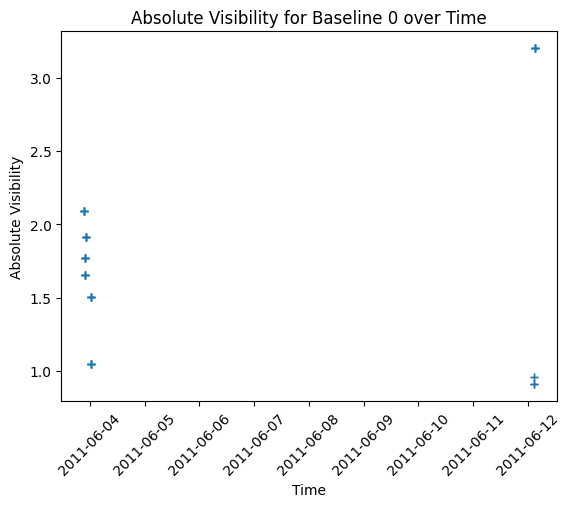

In [ ]:
from astropy.time import Time
import matplotlib.dates as mdates
import matplotlib.pyplot as pl # Import matplotlib.pyplot
import numpy as np # Import numpy

# Using astropy to convert time to human readable as Jeff Kern had a scare
# in the sprint review when we used pandas to do that
time_astropy = Time(ms4.time.data, format='unix', scale='utc')
time_pylab = time_astropy.to_datetime()


pl.plot(time_pylab, np.abs(ms4.VISIBILITY.sel(baseline_id=0, frequency=ms4.frequency[0], polarization=ms4.polarization[0])), '+')
pl.xlabel("Time")
pl.ylabel("Absolute Visibility")
pl.title("Absolute Visibility for Baseline 0 over Time")
s=pl.xticks(rotation=45)

Initialize some gridding parameters. Most are taken from the meta data info of the _ms4_
we'll use a prolate spheroidal function overampled by 100 and having a support of 7 pixels

In [ ]:
help(standard_grid_numpy_wrap_input_checked)

Help on function standard_grid_numpy_wrap_input_checked in module astroviper.core.imaging.imaging_utils.standard_grid:

standard_grid_numpy_wrap_input_checked(vis_data: numpy.ndarray[typing.Any, numpy.dtype[complex]], uvw: numpy.ndarray[typing.Any, numpy.dtype[float]], weight: numpy.ndarray[typing.Any, numpy.dtype[float]], freq_chan: numpy.ndarray[typing.Any, numpy.dtype[float]], cgk_1D: numpy.ndarray[typing.Any, numpy.dtype[float]], image_size: numpy.ndarray[typing.Any, numpy.dtype[int]], cell_size: numpy.ndarray[typing.Any, numpy.dtype[float]], oversampling: int = 100, support: int = 7, complex_grid: bool = True, do_psf: bool = False, chan_mode: str = 'continuum') -> Tuple[numpy.ndarray, numpy.ndarray]
    Parameters
    ----------
    vis_data : np.NDArray[complex]
        Visibilities array has to be of matching shape with uvw
    uvw : np.NDArray[float]
        UVW array each element will have 3 valies
    weight : np.NDArray[float]
        same as vis_data may be less along pol c

In [ ]:
support=7
oversampling=100
#conv func
cgk_1D = create_prolate_spheroidal_kernel_1D(oversampling, support)
vis_data=ms4.VISIBILITY.data
uvw=ms4.UVW.data
#We will initialize all the weights to 1
dims = ms4.dims
weight = np.ones([dims["time"], dims["baseline_id"], dims["frequency"], 1])
freq_chan = ms4.coords["frequency"].values
image_size=np.array([npix, npix])
cell_size= np.array([cell.to("rad").value, cell.to("rad").value])
complex_grid=True
do_psf=False
chan_mode="continuum"

Now we call the gridding code; it returns the complex grid and sumweights

In [ ]:
grid, sumwt = standard_grid_numpy_wrap_input_checked(
            vis_data=vis_data,
            uvw=uvw,
            weight=weight,
            freq_chan=freq_chan,
            cgk_1D=cgk_1D,
            image_size=image_size,
            cell_size=cell_size,
            oversampling=oversampling,
            support=support,
            complex_grid=complex_grid,
            do_psf=do_psf,
            chan_mode=chan_mode
        )

Now FFT back to image domain and correct for the convolution function

In [ ]:
kernel, corrTerm = create_prolate_spheroidal_kernel(
            oversampling, support, image_size)
dirty_im = (
            ifft_uv_to_lm(grid, axes=[2, 3])
            / corrTerm
            * image_size[0]
            * image_size[1]
            / sumwt
        )

locate the sources and compare to what was simulated in

In [ ]:
pos_peaks=np.where(dirty_im[0,0,:,:] > 0.9)

In [ ]:
for posy, posx in zip(pos_peaks[0], pos_peaks[1]):
    print(f'source found at [{posy, posx}] has value of {dirty_im[0,0, posy, posx]}')

source found at [(np.int64(107), np.int64(89))] has value of 0.9539283466457885
source found at [(np.int64(111), np.int64(85))] has value of 0.9000337060924987
source found at [(np.int64(122), np.int64(123))] has value of 0.9357788272760021
source found at [(np.int64(123), np.int64(89))] has value of 0.9084140158961516


In [ ]:
for k in range(len(sources[0])):
    print(f'Simulated source at [{sources[0][k], sources[1][k]}] has value of {sources[2][k]}')

Simulated source at [(np.int64(111), np.int64(85))] has value of 1.0
Simulated source at [(np.int64(123), np.int64(89))] has value of 1.0
Simulated source at [(np.int64(107), np.int64(89))] has value of 1.0
Simulated source at [(np.int64(122), np.int64(123))] has value of 1.0


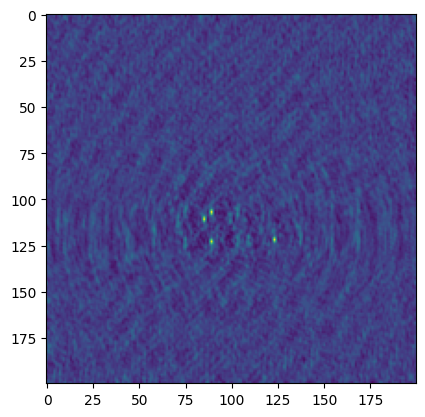

In [ ]:
pl.imshow(dirty_im[0,0,:,:])